In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
#from sklearn.cluster import DBSCAN, HDBSCAN
#from sklearn.preprocessing import quantile_transform
import blimpy as bl
import setigen as stg
from astropy import units as u
import psutil
%matplotlib inline

In [ ]:
# need to put signals in full cadences, not single observations
# adapt RecoveryTest.py 

In [2]:
csv_file = '/home/cgchoza/galaxies/complete_cadences_catalog.csv'

df = pd.read_csv(csv_file)
dfl = df.iloc[np.where(df['Band'].values == 'L')[0]]

del df

In [4]:
dfl.iloc[np.where(dfl['Target'].values == 'MESSIER031')[0]]['.h5 path'].values

array(['/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipelin

In [5]:
h5_list = ['/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

In [19]:
fb = bl.Waterfall(h5_list[0])
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :           1501.4648423530161 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                         67108864
            nifs :                                1
     rawdatafile : guppi_58832_16209_MESSIER031_0057.0000.raw
     source_name :                       MESSIER031
         src_dej :                      41:16:03.72
         src_raj :                      0:42:44.448
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2019-12-15T04:30:09.000
    tstart (MJD) :                

In [50]:
import time

start = time.time()

print(f'Reading Waterfalls ...')
#wf = [bl.Waterfall(h5_list[i], f_start=1350-0.0005, f_stop=1350+0.0005) for i in range(6)]
wf = [bl.Waterfall(h5_list[i]) for i in range(6)]
done_reading = time.time()
print(f'Done reading Waterfalls {done_reading-start}.')
print('Beginning Frame construction ...')

frame_list=[stg.Frame(waterfall=wf[0]),
            stg.Frame(waterfall=wf[1]),
            stg.Frame(waterfall=wf[2]),
            stg.Frame(waterfall=wf[3]),
            stg.Frame(waterfall=wf[4]),
            stg.Frame(waterfall=wf[5])]
done_frame = time.time()
print(f'Done with Frame construction {done_frame-done_reading}')

print('Converting to Cadence ...')

c = stg.Cadence(frame_list)
done_cadence = time.time()
print(f'Done converting {done_cadence-done_frame}.')
print('Adding signal ...')

c.add_signal(stg.constant_path(f_start=(1350-0.000230)*u.MHz,
                               drift_rate=0.2*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=100)),
                           stg.sinc2_f_profile(width=2*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
done_adding = time.time()
print(f'Done adding signal {done_adding-done_cadence}.')
print('Plotting ...')

fig = plt.figure(figsize=(10, 10))
c.plot()

Reading Waterfalls ...
Done reading Waterfalls 28.336511373519897.
Beginning Frame construction ...
Done with Frame construction 571.0925760269165
Converting to Cadence ...
Done converting 0.0006287097930908203.
Adding signal ...


: 

In [32]:
print(c[0].df)

2.7939677238464355


In [16]:
c = stg.Cadence(frame_list)

In [18]:
c.add_signal(stg.constant_path(f_start=c[0].get_frequency(index=1048),
                               drift_rate=0.2*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                           stg.sinc2_f_profile(width=2*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True)

fig = plt.figure(figsize=(10, 10))
c.plot(f_start=c[0].get_frequency(index=1048)-0.0005, f_stop=c[0].get_frequency(index=1048)+0.0005)

KeyboardInterrupt: 

In [ ]:
# try cloning (base) into a new env, uninstalling setigen, and reinstalling using a git clone from the specific version I need

In [3]:
dats = glob.glob('/datax/scratch/benjb/injections/*_inserted.dat')
h5s = glob.glob('/datax/scratch/benjb/injections/*_inserted.h5')

In [4]:
freqs = []
drifts = []
snrs = []

for dat in dats:
    df = pd.read_table(dat, sep='\s+', 
                  names=['Top_Hit_#','Drift_Rate','SNR',
                         'Uncorrected_Frequency','Corrected_Frequency',
                         'Index', 'freq_start', 'freq_end', 'SEFD', 
                         'SEFD_freq', 'Coarse_Channel_Number',
                         'Full_number_of_hits'], skiprows=9)
    
    freq = df['Uncorrected_Frequency'].values[-1]
    drift = df['Drift_Rate'].values[-1]
    snr = df['SNR'].values[-1]
    
    freqs.append(freq)
    drifts.append(drift)
    snrs.append(snr)

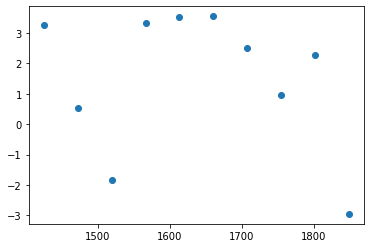

In [7]:
plt.scatter(freqs, drifts)
plt.show()

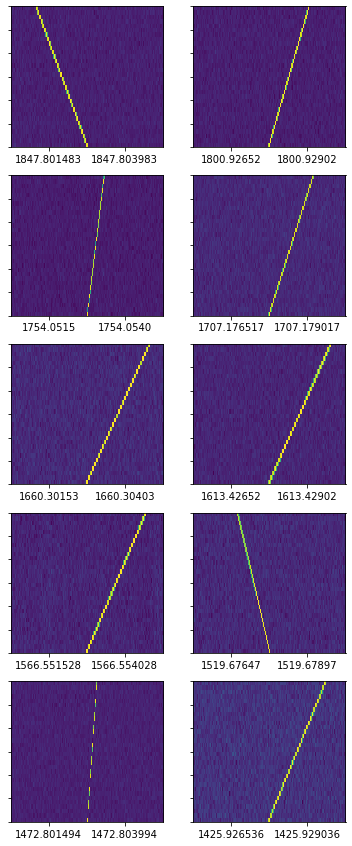

In [34]:
hbw = 0.00500/2

fig, axs = plt.subplots(5, 2, figsize=(6, 15))

for i in range(5):
    for j in range(2):
    
        file_path = h5s[2*i+j]

        freq = freqs[2*i+j]

        fb = bl.Waterfall(file_path, f_start=freq-hbw, f_stop=freq+hbw)
        #fb.plot_waterfall()

        ff, data = fb.grab_data()
        axs[i,j].imshow(np.log10(data), aspect='auto', interpolation='none', extent=[np.max(ff), np.min(ff), 0, 600], origin='lower')
        axs[i,j].invert_xaxis()
        axs[i,j].set_xticks([np.median(ff)-hbw/2, np.median(ff)+hbw/2])
        axs[i,j].set_yticklabels([])
plt.show()
#fb.plot_waterfall()

In [37]:
file_path = h5s[8]

freq = freqs[8]

fb = bl.Waterfall(file_path)
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :           1475.0000000931323 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     source_name :                           DDO210
         src_dej :                      -12:50:54.6
         src_raj :                     20:46:51.672
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2018-07-07T08:49:26.000
    tstart (MJD) :                58306.36766203704
        za_start :                              0.0

Num ints in file :                               32
      File shape :                 (32, 1, 